In [15]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, root_mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import pickle
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt
import pandas as pd

In [19]:
dataset = load_diabetes(as_frame=True, scaled=False).frame
print('Dataset sample:')
print(dataset.head())
print('Dataset info:')
print(dataset.info())
print('Dataset description')
print(dataset.describe())

Dataset sample:
    age  sex   bmi     bp     s1     s2    s3   s4      s5    s6  target
0  59.0  2.0  32.1  101.0  157.0   93.2  38.0  4.0  4.8598  87.0   151.0
1  48.0  1.0  21.6   87.0  183.0  103.2  70.0  3.0  3.8918  69.0    75.0
2  72.0  2.0  30.5   93.0  156.0   93.6  41.0  4.0  4.6728  85.0   141.0
3  24.0  1.0  25.3   84.0  198.0  131.4  40.0  5.0  4.8903  89.0   206.0
4  50.0  1.0  23.0  101.0  192.0  125.4  52.0  4.0  4.2905  80.0   135.0
Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non

In [20]:
X = dataset.drop(columns=['target'])
y = dataset['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_test_pred = model.predict(X_test_scaled)
rmse = root_mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
metrics = [
    ['RMSE', f'{rmse:.2f}'],
    ['R2 score', f'{r2:.2f}'],
    ['MAE', f'{mae:.2f}']
]
print('Model performance:')
print(tabulate(metrics, headers=['Metric', 'Value'], tablefmt='grid'))

features_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_,
    'Abs_Coefficient': np.abs(model.coef_)
}).sort_values('Abs_Coefficient', ascending=False)
print('Features importance:')
print(tabulate(features_importance[['Feature', 'Coefficient']].values, headers=['Feature', 'Coefficient'], tablefmt='grid', floatfmt='.2f'))

Model performance:
+----------+---------+
| Metric   |   Value |
+==========+=========+
| RMSE     |   53.85 |
+----------+---------+
| R2 score |    0.45 |
+----------+---------+
| MAE      |   42.79 |
+----------+---------+
Features importance:
+-----------+---------------+
| Feature   |   Coefficient |
+===========+===============+
| s1        |        -44.45 |
+-----------+---------------+
| s5        |         35.16 |
+-----------+---------------+
| bmi       |         25.61 |
+-----------+---------------+
| s2        |         24.64 |
+-----------+---------------+
| bp        |         16.83 |
+-----------+---------------+
| s4        |         13.14 |
+-----------+---------------+
| sex       |        -11.51 |
+-----------+---------------+
| s3        |          7.68 |
+-----------+---------------+
| s6        |          2.35 |
+-----------+---------------+
| age       |          1.75 |
+-----------+---------------+


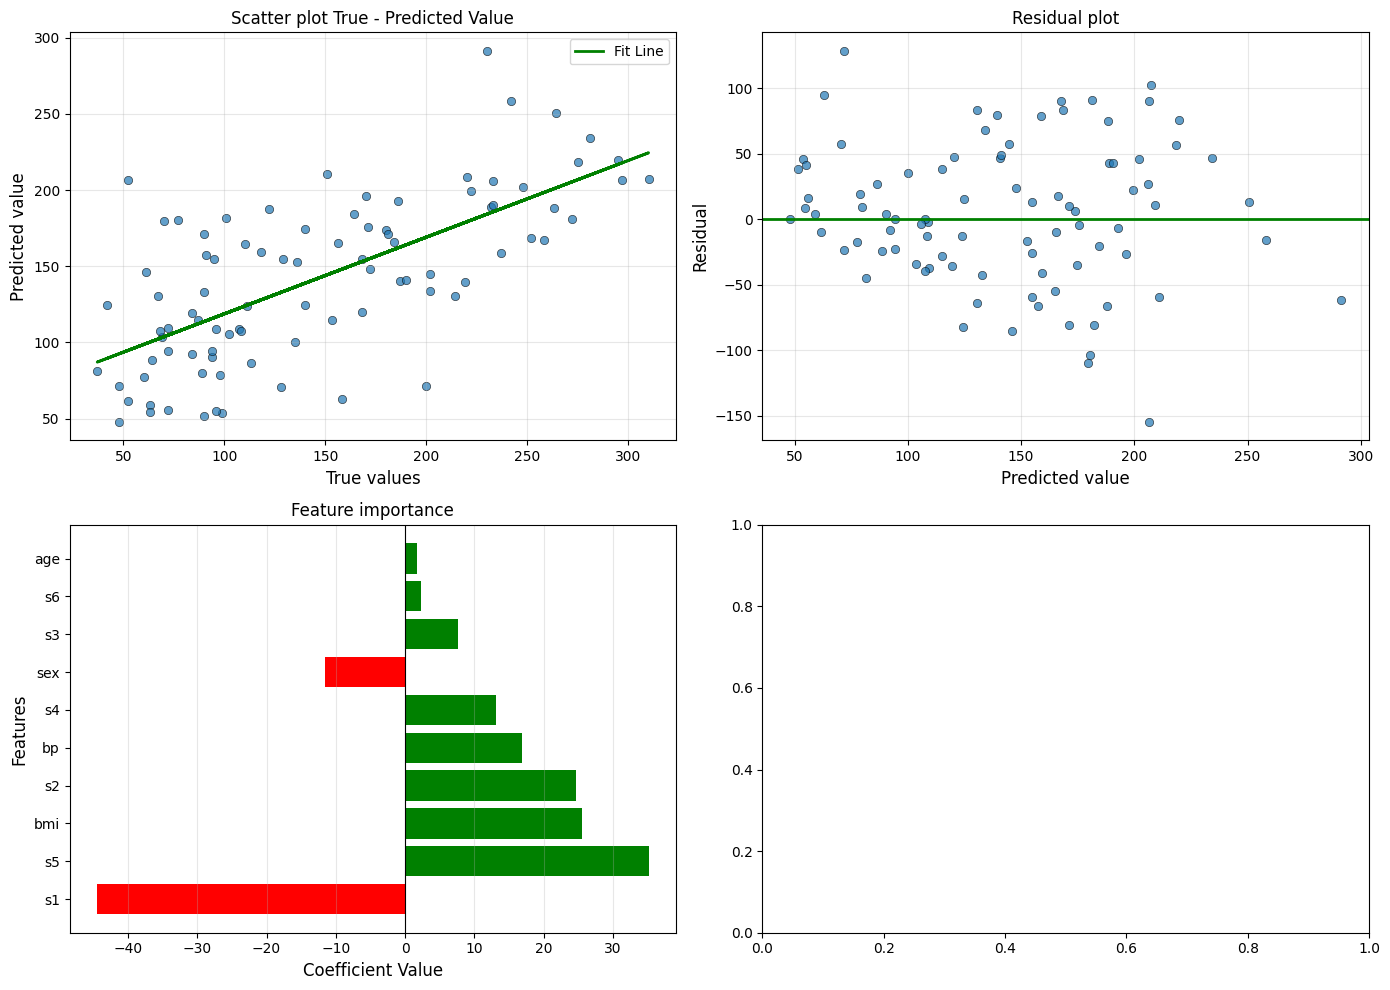

In [22]:
fig, axes = plt.subplots(2, 2, figsize=(14,10))

# Scatter plot with lines

axes[0,0].scatter(y_test, y_test_pred, alpha=0.7, edgecolors='k', linewidth=0.5)
z = np.polyfit(y_test, y_test_pred, 1)
p = np.poly1d(z)
axes[0,0].plot(y_test, p(y_test), 'g-', lw=2, label='Fit Line')
axes[0,0].set_xlabel('True values', fontsize=12)
axes[0,0].set_ylabel('Predicted value', fontsize=12)
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)
axes[0, 0].set_title('Scatter plot True - Predicted Value')

# Residual plot

residuals = y_test - y_test_pred
axes[0,1].scatter(y_test_pred, residuals, alpha=0.7, edgecolors='k', linewidth=0.5)
axes[0,1].axhline(y=0, color='g', linestyle='-', lw=2)
axes[0,1].set_xlabel('Predicted value', fontsize=12)
axes[0,1].set_ylabel('Residual', fontsize=12)
axes[0,1].grid(True, alpha=0.3)
axes[0, 1].set_title('Residual plot')

# Features importances

colors = ['green' if x > 0 else 'red' for x in features_importance['Coefficient']]
axes[1, 0].barh(features_importance['Feature'], features_importance['Coefficient'], color=colors)
axes[1, 0].axvline(x=0, color='black', linestyle='-', lw=0.8)
axes[1, 0].set_xlabel('Coefficient Value', fontsize=12)
axes[1, 0].set_ylabel('Features', fontsize=12)
axes[1,0].set_title('Feature importance')
axes[1,0].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.savefig('../models/model_diabetes_v0.1_result.png', dpi=300, bbox_inches='tight')

In [23]:
with open('../models/scaler_diabetes_v0.1.pkl', 'wb') as file:
    pickle.dump(scaler, file)
with open('../models/model_diabetes_v0.1.pkl', 'wb') as file:
    pickle.dump(model, file)
# joblib.dump(model, '../models/model_diabetes_v0.1.pkl')
print('Save scaler and models to ../models folder')

Save scaler and models to ../models folder
